# Modelowanie Pandemii SARS COV-19

---

# 1.Historia

---

# 2.Podstawy teoretyczne

## 2.1Łańcuch markowa

Łańcuchy Markowa to matematyczne narzędzie, które znajduje szerokie zastosowanie w modelowaniu procesów stochastycznych, gdzie przyszły stan systemu zależy tylko od jego obecnego stanu, a nie od historii. Tego rodzaju procesy oparte na tzw. "braku pamięci" pozwalają na analizowanie i przewidywanie dynamiki zjawisk, które zachodzą w czasie, takich jak rozprzestrzenianie się chorób, ewolucja populacji czy decyzje gospodarcze.


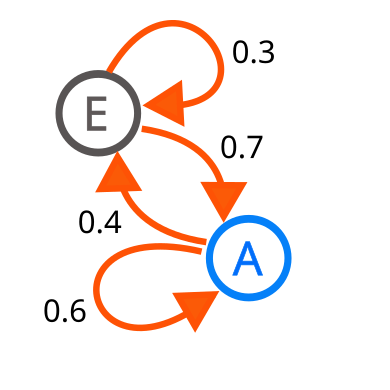

Łańcuchy Markowa oraz modele SI i SIR łączy fakt, że oba narzędzia służą do opisywania procesów przejścia z jednego stanu do drugiego w systemach dynamicznych. Modele te przedstawiają zbiór stanów(ogniwa), przejścia między nimi oraz prawdopodobieństwo, z jakim dane przejście może nastąpić. Kluczowym założeniem, jest to, że procesy te są "bez pamięci", co oznacza, że decyzja o przejściu do kolejnego stanu zależy wyłącznie od aktualnego stanu, a nie od historii wcześniejszych przejść. Na przykład, w kontekście modeli SIR i SI, skupiamy się na stanie faktycznym, a nie na sytuacji, w której dana jednostka już kiedyś była chora.

Jednakże, w przeciwieństwie do klasycznych łańcuchów Markowa, które zakładają stałe prawdopodobieństwo przejścia między stanami, modele SIR i SI są bardziej złożone. W tych modelach prawdopodobieństwa przejść zależą od różnych czynników, takich jak współczynnik zakażeń ($\beta$) lub wyzdrowień ($\gamma$) oraz czas trwania infekcji, które zmieniają się w zależności od etapu epidemii, siły choroby oraz innych parametrów epidemiologicznych. Na przykład, współczynnik zakażeń może się różnić w zależności od stopnia kontaktów międzyludzkich, dostępności leczenia czy interwencji zdrowotnych, co sprawia, że te modele są bardziej dynamiczne i uwzględniają zmienność w czasie.

W związku z tym, można stwierdzić, że modele SIR i SI są pochodnymi łańcuchów Markowa. Natomiast dzięki bardziej złożónym parametrom modele epidemiologiczne lepiej analizują rozprzestrzeniania się chorób, które uwzględniają zmieniające się warunki oraz charakterystykę populacji. 

## 2.2Wprowadzenie do modelu SI:

Model SI (Susceptible-Infected) jest podstawowym modelem epidemiologicznym wykorzystywanym do opisu rozprzestrzeniania się chorób zakaźnych w populacji. Zakłada on dwie podstawowe grupy: osoby podatne na zakażenie (S) oraz osoby zakażone (I). Razem tworzą one populację (N). 
$${N} = {S} + {I}$$
Osoby zakażone mogą przekazywać chorobę osobom podatnym, co prowadzi do wzrostu liczby zakażonych, podczas gdy liczba osób podatnych maleje. Kluczowym parametrem w modelu jest szybkość zarażania $\beta$, który opisuje tempo, z jakim choroba jest przekazywana. Współczynnik ten zależy od liczby kontaktów między osobami zakażonymi a osobami podatnymi na zakażenie. Możemy wyróżnić:
$$
\beta \cdot I - \text{Liczba kontaktów ogólna} \\
\beta \cdot I \cdot \frac{S}{N} - \text{Liczba kontaktów z podatnymi}
$$

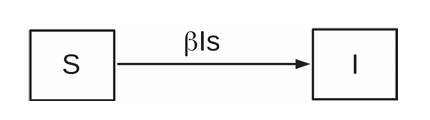

Schemat modelu SI. Rysunek jest z artykulu [numer artykulu]. Małe s na obrazku reprezentuje $S/N$. Jest to także przykładowy łańcuch markowa.

Przyrost nowych zakażeń($I_{new}$) można zapisać wzorem:
$$ {I_{new}} = \delta \cdot \beta \cdot I \cdot \frac{S}{N}$$
Dodatkowo zmianę liczby zakażeń w czasie można zapisać jako:
$$I( t + \delta ) = I(t) + I_{new} $$
Dzieki temu otrzymamy:
$$I( t + \delta ) = I(t) + \delta \cdot \beta \cdot I \cdot \frac{S}{N}$$
Po odpowiednich przekształceniach[numer artykulu] dostaniemy 
$$\frac{dI}{dt} = \beta \cdot I(t) \cdot \frac{S(t)}{N}$$

Model ten jest stosunkowo prosty i skuteczny w analizie wczesnych etapów epidemii, gdy nie uwzględniamy jeszcze osób wyleczonych, zmarłych, ani innych czynników, które mogą wpływać na dynamikę choroby. Model SI jest szczególnie użyteczny do prognozowania, jak szybko będzie rosła liczba zakażonych w populacji, szczególnie w fazie wzrostu epidemii.

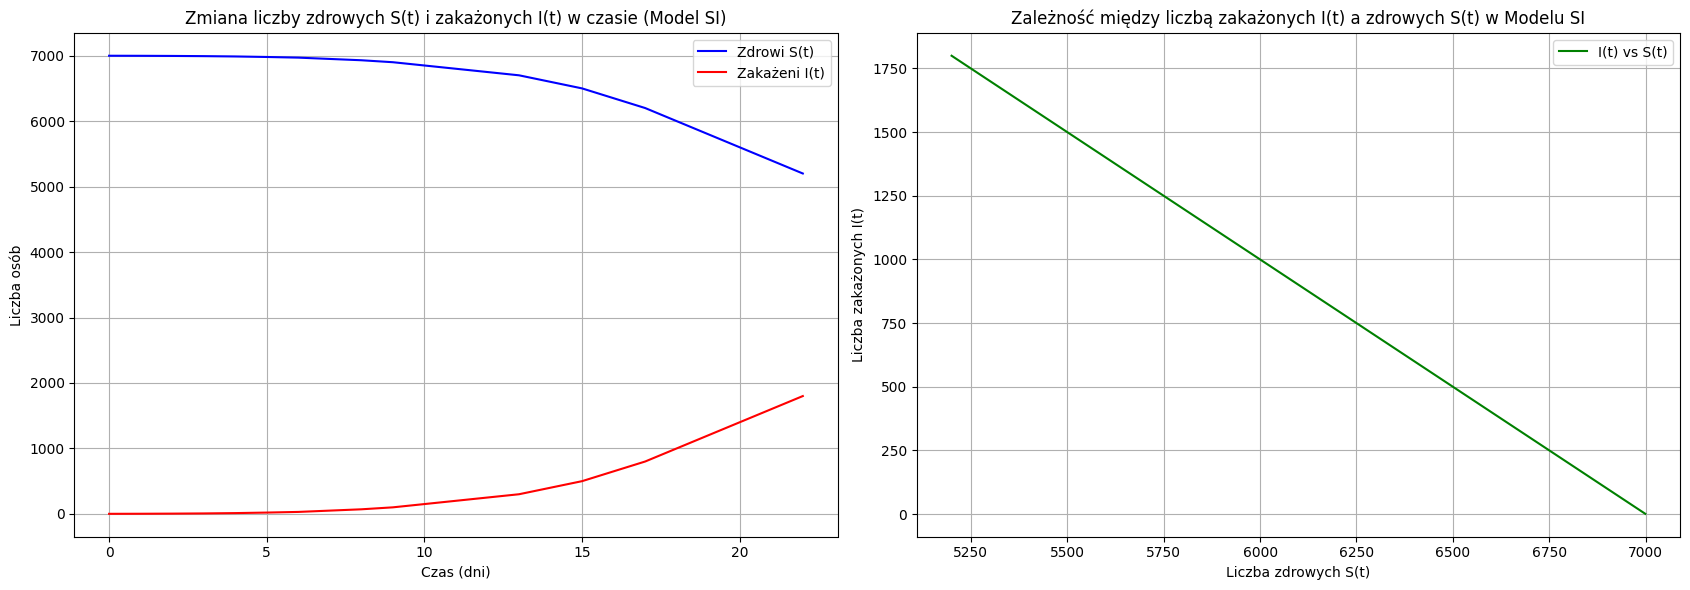

In [94]:
import numpy as np
import matplotlib.pyplot as plt

# Parametry
N = 7000  # Całkowita liczba osób w populacji
infected_data = [1, 2, 4, 7, 12, 20, 30, 50, 70, 100, 150, 200, 250, 300, 400, 500, 650, 800, 1000, 1200, 1400, 1600, 1800]
susceptible_data = [N - infected_data[i] for i in range(len(infected_data))]

# Wykresy
fig, ax = plt.subplots(1, 2, figsize=(17, 6))

# Wykres S(t) i I(t) na jednym wykresie
ax[0].plot(susceptible_data, label="Zdrowi S(t)", color='blue')
ax[0].plot(infected_data, label="Zakażeni I(t)", color='red')
ax[0].set_title("Zmiana liczby zdrowych S(t) i zakażonych I(t) w czasie (Model SI)")
ax[0].set_xlabel("Czas (dni)")
ax[0].set_ylabel("Liczba osób")
ax[0].legend()
ax[0].grid(True)

# Wykres I(t) w zależności od S(t)
ax[1].plot(susceptible_data, infected_data, label="I(t) vs S(t)", color='green')
ax[1].set_title("Zależność między liczbą zakażonych I(t) a zdrowych S(t) w Modelu SI")
ax[1].set_xlabel("Liczba zdrowych S(t)")
ax[1].set_ylabel("Liczba zakażonych I(t)")
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

## 2.3Wprowdzenie do modelu SIR

Model SIR (Susceptible-Infected-Recovered) wprowadza do wcześniej poznanych kategorii S (osoby podatne na zakażenie) oraz I (osoby zakażone) nową kategorię: 𝑅 (osoby wyzdrowiałe lub zmarłe). Do kategorii zaliczają się osoby, które nie są już dłużej zakażone. Obejmuje to zarówno osoby, które zmarły w wyniku choroby, jak i te, które wyzdrowiały, nabywając odporność (nie mogą zachorować ponownie).
W przeciwieństwie do modelu SI, w modelu SIR liczba zakażonych osiąga szczyt, a następnie maleje, ponieważ coraz więcej osób przechodzi do kategorii 
R. Jest to jeden z podstawowych modeli epidemiologicznych, szeroko stosowany do opisu przebiegu epidemii.
Dodatkowo w modelu pojawia się nowy parametr: szybkość zdrowienia $\gamma$, który określa tempo przechodzenia osób zakażonych do kategorii R. Liczbę ozdrowień w czasie możemy wyrazić wzorem:
$$\gamma \cdot {I} - \text{Liczba ozdrowień w czasie}$$

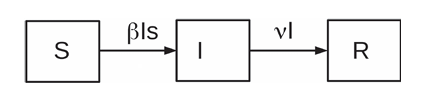

Schemat modelu SIR. Rysunek jest z artykulu [numer artykulu]. Małe s na obrazku reprezentuje $S/N$, a ${v}$ gammę. Jest to także przykładowy łańcuch markowa.

Możemy zapisać równanie:
$$ S(t + \delta) = S(t) - I_{new}$$
Dzięki czemu dla liczby osobników podatnych otrzymamy
$$\frac{dS}{dt} = - \beta \cdot {I(t)} \cdot \frac{S(t)}{N}$$
Po odpowiednich przekształceniach dostaniemy:
$$
\frac{dI}{dt} = \beta \cdot I(t) \cdot \frac{S(t)}{N} - \gamma \cdot {I} \\
\frac{dR}{dt} = \gamma \cdot {I}
$$
Te trzy równania stanowią ostateczną postać modelu SIR, opisującą dynamikę zmian w liczebności poszczególnych grup.
Model SIR można rozszerzyć, wprowadzając różne relacje pomiędzy grupami, np. uwzględniając sytuację, w której osobnik nie nabywa odporności i może ponownie zachorować. Jednak w naszym projekcie skupimy się na jego klasycznej formie. Model ten, mimo swojej prostoty, jest kluczowym narzędziem do analizy rozprzestrzeniania się chorób i stanowi fundament bardziej zaawansowanych modeli epidemiologicznych.

## Wykres Modelu SIR w Python

Na potrzebe pokazania jak zachowuje się Model SIR w czasie Pandemii przyjmiemy inne dane, ponieważ dla $n=37.900.000$ przy pierwszych 37 dniach nie zobaczymy pełnego zachowania Pandemii, przyjmiemy, że $n=7000$.

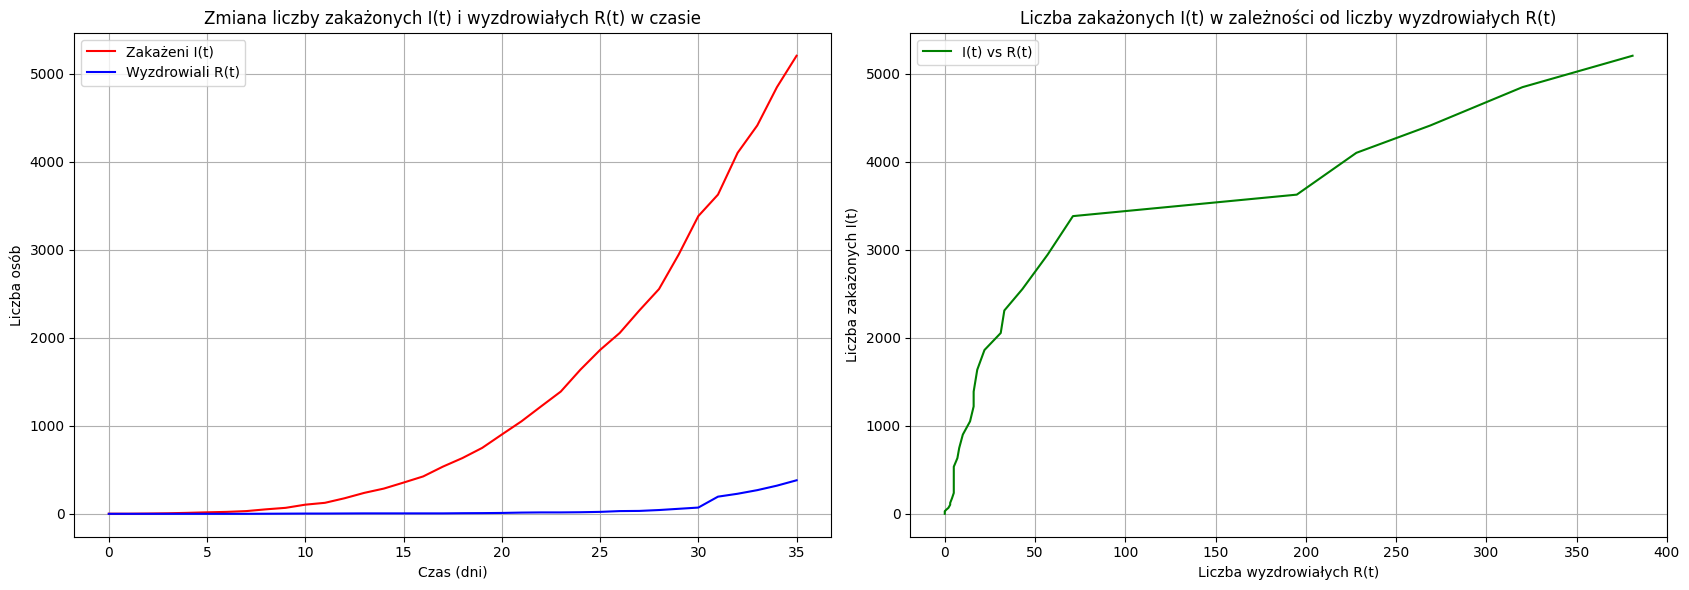

In [95]:
import numpy as np
import matplotlib.pyplot as plt




# Parametry
N = 7000
infected_data = [1, 1, 3, 6, 11, 17, 22, 31, 51, 68, 104, 125, 177, 238, 287, 355, 425, 536, 
                 634, 749, 901, 1051, 1221, 1389, 1638, 1862, 2055, 2311, 2554, 2946, 3383, 
                 3627, 4102, 4413, 4848, 5205]
recovery_data = [0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 3, 4, 5, 5, 5, 5, 5, 7, 8,
                 10, 14, 16, 16, 18, 22, 31, 33, 43, 57, 71, 195, 228, 269, 320, 381]

# Tworzymy wykresy
fig, ax = plt.subplots(1, 2, figsize=(17, 6))

# Wykres I(t) i R(t) na jednym wykresie
ax[0].plot(infected_data, label="Zakażeni I(t)", color='red')
ax[0].plot(recovery_data, label="Wyzdrowiali R(t)", color='blue')
ax[0].set_title("Zmiana liczby zakażonych I(t) i wyzdrowiałych R(t) w czasie")
ax[0].set_xlabel("Czas (dni)")
ax[0].set_ylabel("Liczba osób")
ax[0].legend()
ax[0].grid(True)

# Wykres I(t) w zależności od R(t)
ax[1].plot(recovery_data, infected_data, label="I(t) vs R(t)", color='green')
ax[1].set_title("Liczba zakażonych I(t) w zależności od liczby wyzdrowiałych R(t)")
ax[1].set_xlabel("Liczba wyzdrowiałych R(t)")
ax[1].set_ylabel("Liczba zakażonych I(t)")
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()


---

# Obliczanie współczynników $\beta$ i $\gamma$ za pomocą metody brute-force (Algorytm siłowy)

## Metoda brute force

Algorytm brute force, czyli "siłowy", polega na przeszukaniu całego dostępnego zakresu możliwych wartości dla współczynników $\beta$ i $\gamma$ oraz znalezieniu takich, które minimalizują błąd dopasowania modelu do danych.

1. Zaczynamy od ustalenia zakresu wartości, w którym będziemy szukać optymalnych współczynników. $\beta$ i $\gamma$:
   - W tym przykładzie $\beta \in [0, 0.5]$, a $\gamma \in [0,0.3]$.

2. Dla każdej pary wartości $\beta$ i $\gamma$ rozwiązujemy równania modelu SIR, a następnie obliczamy, jak bardzo przewidywane wyniki różnią się od rzeczywistych danych zakażonych (I) i wyzdrowiałych (R). Błąd dopasowania jest mierzony jako średni błąd kwadratowy (Mean Squared Error - MSE).

3. Algorytm przechodzi przez wszystkie kombinacje $\beta$ i $\gamma$ w zadanym zakresie, obliczając dla każdej kombinacji błąd dopasowania. Na końcu wybieramy parametry, które minimalizują ten błąd.

### Mean Squared Error

Mean Squared Error(MSE) to metoda wyznaczania błędu dopasowania modelu do danych rzeczywistych, polega na obliczeniu średniej z kwadratu różnicy danych rzeczyiwstych i danych pochodzących z modelu matematycznego. Wyrażenie różnić jako kwadratów jest konieczne, aby wyeliminować sytuacje w której dodatnie i ujemne różnice odejmowały by się od siebie dając wynik równy zero.

**Wzór na błąd średniokwadratowy (MSE):**
$$\text{MSE} = \frac{\sum_{i=1}^{n} (y_i - p_i)^2}{n}$$
+ $y_i$ realna wartość 
+ $p_i$ modelowana wartość
+ $n$ liczba obserwacji
+ $\Sigma$ suma wszystkich różnić
### Zastosowanie

Metoda brute force jest stosunkowo prosta, ale może być czasochłonna przy dużych zakresach parametrów. Pomimo tego jest bardzo intuicyjna i skuteczna w przypadku małych przestrzeni poszukiwań, jak w tym przykładzie. Po znalezieniu optymalnych współczynników możemy wykorzystać model SIR do prognozowania przyszłego rozwoju epidemii.

## Implementacja w Python dla modelu SIR

In [96]:
import numpy as np
from scipy.integrate import odeint

# Parametry modelu
N = 37_900_000  
infected_data = [1, 1, 3, 6, 11, 17, 22, 31, 51, 68, 104, 125, 177, 238, 287, 355, 425, 536, 
                 634, 749, 901, 1051, 1221, 1389, 1638, 1862, 2055, 2311, 2554, 2946, 3383, 
                 3627, 4102, 4413, 4848, 5205]
recovery_data = [0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 3, 4, 5, 5, 5, 5, 5, 7, 8,
                 10, 14, 16, 16, 18, 22, 31, 33, 43, 57, 71, 195, 228, 269, 320, 381]
susceptible_data = [N - infected_data[i] - recovery_data[i] for i in range(len(infected_data))]

# Funkcja opisująca model SIR
def sir_model(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N  
    dIdt = beta * S * I / N - gamma * I  
    dRdt = gamma * I  
    return [dSdt, dIdt, dRdt]

# Zakresy poszukiwań dla beta i gamma
beta_range = np.linspace(0, 0.5, 50)
gamma_range = np.linspace(0, 0.3, 50)

# Funkcja do obliczenia błędu dopasowania
def calculate_error(beta, gamma):
    S0 = N - infected_data[0] - recovery_data[0]  
    I0 = infected_data[0]  
    R0 = recovery_data[0]  
    
    # Rozwiązanie równań SIR
    t = np.linspace(0, len(infected_data), len(infected_data))  # Czas (dni)
    solution = odeint(sir_model, [S0, I0, R0], t, args=(beta, gamma))
    
    # Obliczamy błąd dopasowania (średni błąd kwadratowy)
    I_model = solution[:, 1]
    R_model = solution[:, 2]
    
    mse = np.mean((I_model - np.array(infected_data))**2 + (R_model - np.array(recovery_data))**2)
    return mse

# Przeszukujemy przestrzeń parametrów beta i gamma
best_beta = 0
best_gamma = 0
min_error = float('inf')

for beta in beta_range:
    for gamma in gamma_range:
        error = calculate_error(beta, gamma)
        if error < min_error:
            min_error = error
            best_beta = beta
            best_gamma = gamma

# Wyświetlamy najlepsze parametry
print(f"Optymalne beta: {best_beta}")
print(f"Optymalne gamma: {best_gamma}")


Optymalne beta: 0.26530612244897955
Optymalne gamma: 0.01836734693877551


---

# Metoda Eulera rozwiązywania równań różniczkowych

## Wyjaśnienie metody Eulera

Metoda Eulera służy do rozwiązywania równań różniczkowych pierwszego rzędu w postaci [[x]](https://vistula.pk.edu.pl/~sciezor/Kurs_TI_XP/Excel2_lekcja_4.pdf):


\begin{equation}
\frac{dy}{dt} = f(t, y), \quad y(x_0) = y_0
\end{equation}

Zakładamy, że każdy kolejny punkt jest oddalony o krok **h** na osi **OX** oraz o $\Delta$**y** na osi **OY**  

\begin{equation}
x_{n+1} = x_n + h
\end{equation}

Z definicji pochodnej, rozumianej jako tangens kąta nachylenia stycznej w punkcie na wykresie funkcji, wynika, że

\begin{equation}
y' = \frac{\Delta y}{h} = f(x_n, y_n)
\end{equation}

Po przekształceniu:


\begin{equation}
\Delta y = h \cdot f(x_n, y_n)
\end{equation}

Wzór na kolejny $y_{n+1}$ będzie zależał od $y_n$ oraz $\Delta$**y**

\begin{equation}
y_{n+1} = y_n + h \cdot f(x_n, y_n)
\end{equation}

## Numeryczne rozwiązanie metodą Eulera równania SI

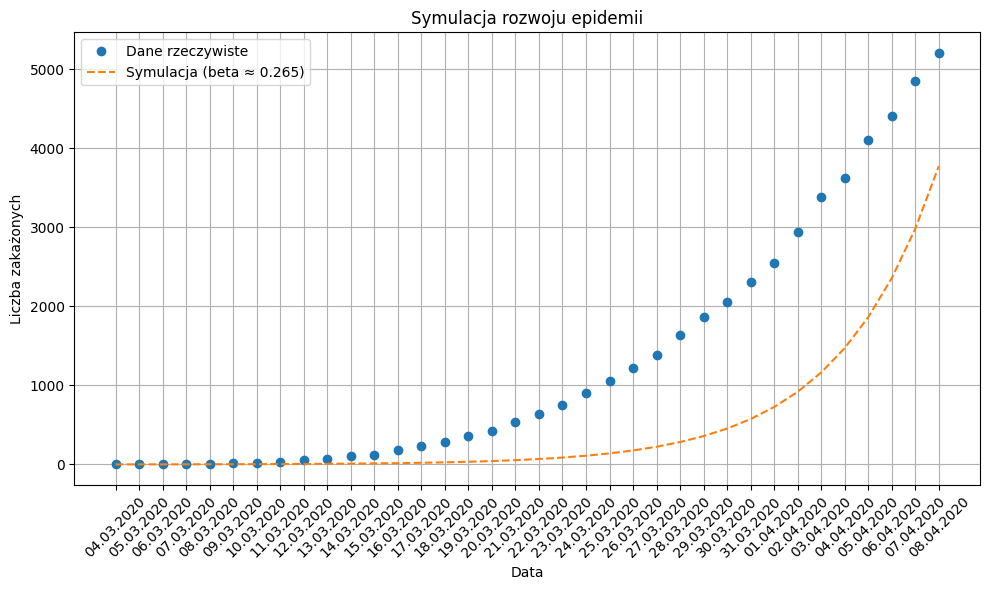

In [97]:

# Parametry początkowe
n = 37_900_000  # Populacja
S0 = n - 1  # Liczba osób podatnych (cała populacja z wyjąciem jednej osoby zakażonej)
I0 = 1  # Liczba początkowych zakażonych

# Dane: dni i liczba zakażonych
dates = ['04.03.2020', '05.03.2020', '06.03.2020', '07.03.2020', '08.03.2020', '09.03.2020',
         '10.03.2020', '11.03.2020', '12.03.2020', '13.03.2020', '14.03.2020', '15.03.2020',
         '16.03.2020', '17.03.2020', '18.03.2020', '19.03.2020', '20.03.2020', '21.03.2020', '22.03.2020', '23.03.2020', '24.03.2020', '25.03.2020', '26.03.2020', 
         '27.03.2020', '28.03.2020', '29.03.2020', '30.03.2020', '31.03.2020', '01.04.2020',
         '02.04.2020', '03.04.2020', '04.04.2020', '05.04.2020', '06.04.2020', '07.04.2020', '08.04.2020']
infected_data = [1, 1, 3, 6, 11, 17, 22, 31, 51, 68, 104, 125, 177, 238, 287, 355, 425, 536, 634, 749, 901, 1051, 1221, 1389, 1638, 1862, 2055, 2311, 2554, 
                 2946, 3383, 3627, 4102, 4413, 4848, 5205]  # Dane o liczbie zakażonych  # Dane zakażonych

# Symulacja numeryczna metodą Eulera
def update(beta):
    t_max = len(dates)  # Ilość dni
    I = np.zeros(t_max)
    S = np.zeros(t_max)
    I[0] = I0
    S[0] = S0
# Krok czasowy
    dt = 1
# Rozwiązanie równania metodą Eulera
    for t in range(1, t_max):
        dI = beta * I[t-1] * S[t-1] * dt / n
        I[t] = I[t-1] + dI
        S[t] = S[t-1] - dI

# Porównanie z danymi
    plt.figure(figsize=(10, 6))
    plt.plot(range(t_max), infected_data, 'o', label='Dane rzeczywiste')
    plt.plot(range(t_max), I, label=f'Symulacja (beta ≈ {best_beta:.3f})', linestyle='--')
    plt.xticks(range(t_max), dates, rotation=45)
    plt.xlabel('Data')
    plt.ylabel('Liczba zakażonych')
    plt.title('Symulacja rozwoju epidemii')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

update(best_beta)



## Numeryczne rozwiązanie metodą Eulera równania SIR

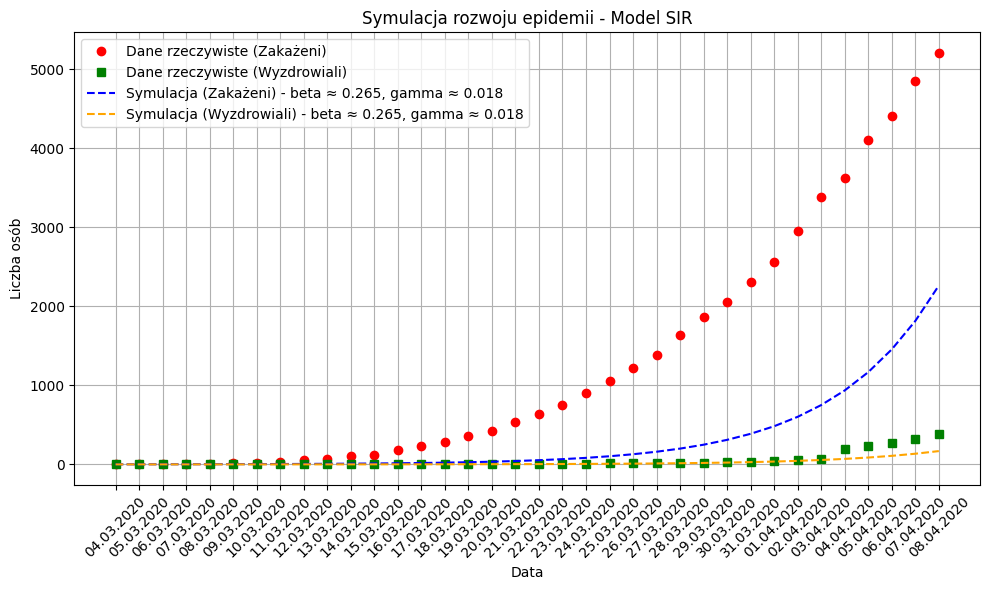

In [98]:
# Funkcja do aktualizacji wykresu
def update_model(beta, gamma):
    t_max = len(dates)
    S = np.zeros(t_max)
    I = np.zeros(t_max)
    R = np.zeros(t_max)
    R0 = 0
    S[0] = S0  # S0 to początkowa liczba osób zdrowych
    I[0] = I0  # I0 to początkowa liczba zakażonych
    R[0] = R0  # R0 to początkowa liczba wyzdrowiałych
    dt = 1  # Krok czasowy (1 dzień)

    # Pętla symulacji modelu SIR
    for t in range(1, t_max):
        dS = -beta * S[t-1] * I[t-1] * dt / n
        dI = beta * S[t-1] * I[t-1] * dt / n - gamma * I[t-1] * dt
        dR = gamma * I[t-1] * dt
        S[t] = S[t-1] + dS
        I[t] = I[t-1] + dI
        R[t] = R[t-1] + dR

    # Zapisanie wyników do Se (S(t)) i Ie (I(t))
    Se = S
    Ie = I

    # Tworzenie wykresu
    plt.figure(figsize=(10, 6))
    plt.plot(range(t_max), infected_data, 'o', label='Dane rzeczywiste (Zakażeni)', color='red')
    plt.plot(range(t_max), recovery_data, 's', label='Dane rzeczywiste (Wyzdrowiali)', color='green')
    plt.plot(range(t_max), Ie, label=f'Symulacja (Zakażeni) - beta ≈ {beta:.3f}, gamma ≈ {gamma:.3f}', linestyle='--', color='blue')
    plt.plot(range(t_max), R, label=f'Symulacja (Wyzdrowiali) - beta ≈ {beta:.3f}, gamma ≈ {gamma:.3f}', linestyle='--', color='orange')

    plt.xticks(range(t_max), dates, rotation=45)
    plt.xlabel('Data')
    plt.ylabel('Liczba osób')
    plt.title('Symulacja rozwoju epidemii - Model SIR')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    plt.show()

    # Zwrócenie Se i Ie
    return Se, Ie

# Wywołanie funkcji z parametrami beta i gamma
Se, Ie = update_model(best_beta, best_gamma)

# Możesz teraz wykorzystać Se i Ie w dalszej analizie


## Wyniki modelowania metodą Eulera dla SI i SIR


# SI

Na wykresie można zaobserwować powolny wzrost liczby chorych, natomiast zastosowany model SI wykazuje bardzo gwałtowny wzrost. Model SI przewiduje dalszy, bardzo szybki wzrost liczby zakażonych, który nie ma odzwierciedlenia w rzeczywistych danych. Wynika to z tego, że model SI nie uwzględnia wielu czynników zewnętrznych takich jak śmierć osób zakażonych, interwencji społecznych, osób wyleczonych czy też osób narażonych na zakażenie, które wpływają na tempo rozwoju epidemii. Model SI, oparty na stałym współczynniku infekcji, nie uwzględnia dynamicznych zmian w rozwoju epidemii, co może prowadzić do nadmiernego prognozowania osób zarażonych. Współczynnik $\beta$ może być różny w innych etapach epidemii, więc stały parametr nie odzwierciedla realnej sytuacji. 

# SIR

Model SIR pokazuje wolniejszy wzrost zakażonych niż model SI. Można zauważyć, że dodanie współczynnika odpowiadającego za osoby wyleczone zwalnia wzrost zakażeń w symulacji, dzięki czemu bardziej odpowiada danym rzeczywistym. Warto podkreślić, że nie jest to idealny model, ponieważ podobnie jak model SI nie uwzględnia wiele czynników, które wpływają na rozwój epidemii. Model SIR może sprawdzić się w modelowaniu początku epidemii, w kolejnych fazach epidemii problemem mogą okazać się stałe współczynniki $\beta$ oraz $\gamma$.

---

# Metoda Runge-Kutta rzędu 4 (RK4) rozwiązywania równań różniczkowych

## Wyjaśnienie metody Runge-Kutta rzędu 4 (RK4)

Metoda RK4 jest jedną z najczęściej używanych metod numerycznych do rozwiązywania równań różniczkowych zwyczajnych. Popularność zawdzięcza swojej wyjątkowej precyzji, będącej efektem wyższego rzędu dokładności w stosunku do prostszych metod, takich jak metoda Eulera.

Metoda Rungego-Kutty rzędu 4 (RK4) opiera się na następujących wzorach:

1. Początkowy warunek:
$$u_0 = \alpha$$

2. Wyznaczanie kolejnych współczynników:
$$k_1 = F(t, y_n)$$
$$k_2 = F\left(t + \frac{h}{2}, y_n + \frac{1}{2}k_1\right)$$
$$k_3 = F\left(t + \frac{h}{2}, y_n + \frac{1}{2}k_2\right)$$
$$k_4 = F\left(t + h, y_n\right)$$

3. Aktualizacja wartości $u_{i+1}$:
$$y_{i+1} = y_i + \frac{h}{6} \left(k_1 + 2k_2 + 2k_3 + k_4\right), \quad \text{dla } n = 0, 1, \ldots$$

Gdzie:
* ${h}$ — krok czasowy,
* ${F(t,y)}$ — funkcja opisująca równanie różniczkowe $\frac{dy}{dt} = F(t, y)$,
* ${t}$ — czas,
* ${y_n}$ — wartość rozwiązania w kroku ${n}$.

## Numeryczne rozwiązanie metodą Runge-Kutta rzędu 4 modelu SI 

Żeby obliczyc model SI numerycznie przyjmiemy zapis gdzie:
$$\frac{dy}{dt} = F(t, y)$$
oraz
$${y}=
\begin{bmatrix}
S\left(t\right) \\
I\left(t\right)
\end{bmatrix},
~~{F(t,y)}=\begin{bmatrix}
f\left(t,S,I\right) \\
g\left(t,S,I\right) 
\end{bmatrix}

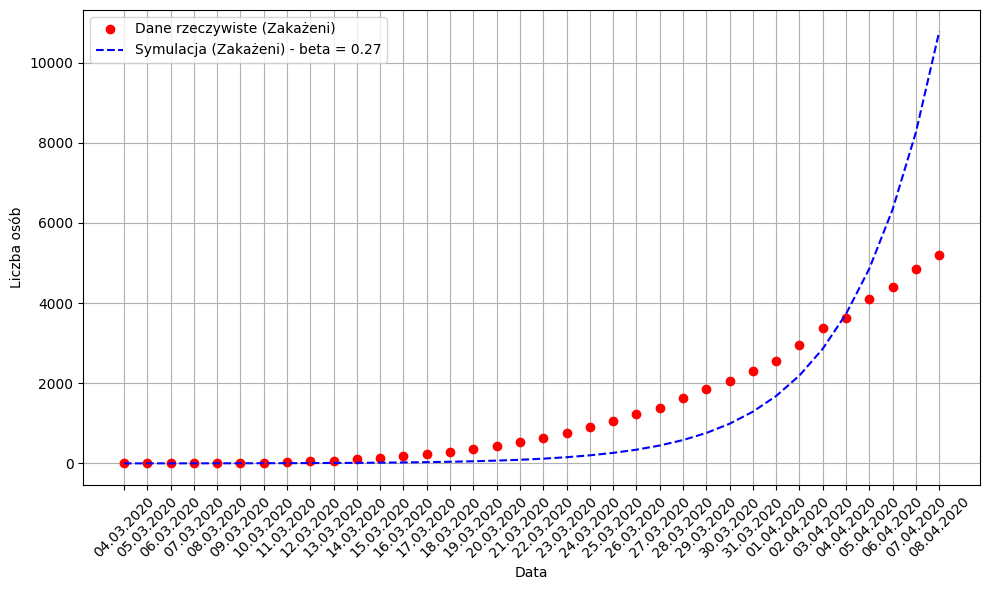

In [99]:
# Funkcja dla modelu SI
def f(S, I, beta, N):
    return -beta * S * I / N

def g(S, I, beta, N):
    return beta * S * I / N

# RK4 dla modelu SI
def rk4_step(S, I, beta, N, h):
    k1_S = f(S, I, beta, N)
    k1_I = g(S, I, beta, N)
    
    k2_S = f(S + h * k1_S / 2, I + h * k1_I / 2, beta, N)
    k2_I = g(S + h * k1_S / 2, I + h * k1_I / 2, beta, N)
    
    k3_S = f(S + h * k2_S / 2, I + h * k2_I / 2, beta, N)
    k3_I = g(S + h * k2_S / 2, I + h * k2_I / 2, beta, N)
    
    k4_S = f(S + h * k3_S, I + h * k3_I, beta, N)
    k4_I = g(S + h * k3_S, I + h * k3_I, beta, N)
    
    # Klasyczna aktualizacja wartości
    S_new = S + h / 6 * (k1_S + 2 * k2_S + 2 * k3_S + k4_S)
    I_new = I + h / 6 * (k1_I + 2 * k2_I + 2 * k3_I + k4_I)
    
    return S_new, I_new

# Warunki początkowe
S, I = n - infected_data[0], infected_data[0]
h = 1  # Krok czasowy (1 dzień)
S_vals, I_vals = [S], [I]

# Symulacja RK4
for t in range(1, len(dates)):
    S, I = rk4_step(S, I, best_beta, n, h)
    S_vals.append(S)
    I_vals.append(I)

# Wykresy
plt.figure(figsize=(10, 6))
plt.plot(dates, infected_data, 'o', label='Dane rzeczywiste (Zakażeni)', color='red')
plt.plot(dates, I_vals, label=f'Symulacja (Zakażeni) - beta = {best_beta:.2f}', linestyle='--', color='blue')
plt.xticks(rotation=45)
plt.xlabel("Data")
plt.ylabel("Liczba osób")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Numeryczne rozwiązanie metodą Runge-Kutta rzędu 4 modelu SI 
Żeby obliczyc model SIR numerycznie przyjmiemy zapis gdzie:
$$\frac{dy}{dt} = F(t, y)$$
oraz
$${y}=
\begin{bmatrix}
S\left(t\right) \\
I\left(t\right) \\
R\left(t\right)
\end{bmatrix},
~~{F(t,y)}=\begin{bmatrix}
f\left(t,S,I,R\right) \\
g\left(t,S,I,R\right) \\
j\left(t,S,I,R\right)
\end{bmatrix}

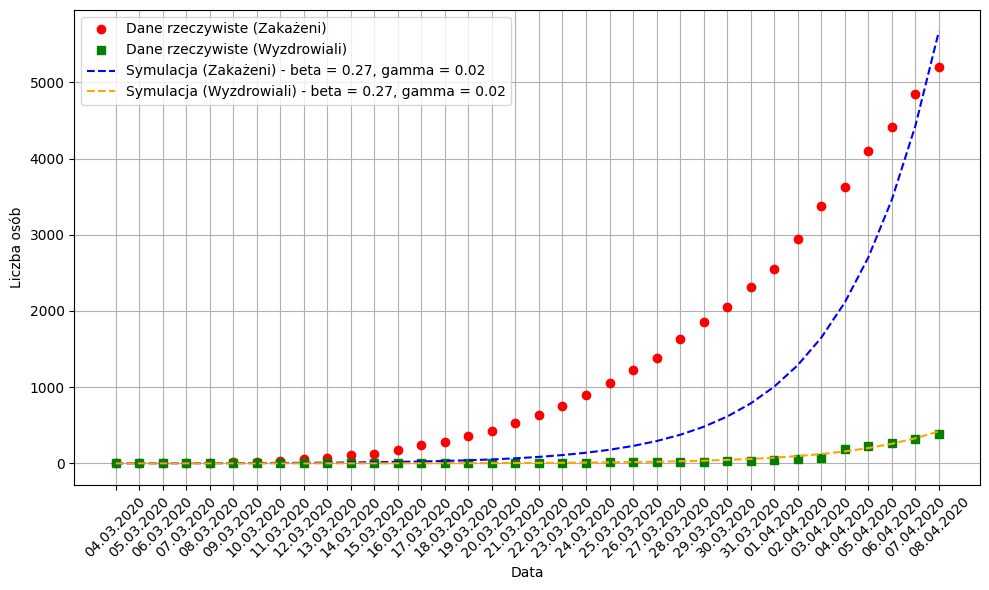

In [100]:
# Funkcje SIR
def f(S, I, R, beta):
    return -beta * S * I / n

def g(S, I, R, beta, gamma):
    return beta * S * I / n - gamma * I

def j(S, I, R, gamma):
    return gamma * I

# RK4 dla modelu SIR
def rk4_step(S, I, R, beta, gamma, h):
    k1_S = f(S, I, R, beta)
    k1_I = g(S, I, R, beta, gamma)
    k1_R = j(S, I, R, gamma)
    
    k2_S = f(S + h * k1_S / 2, I + h * k1_I / 2, R + h * k1_R / 2, beta)
    k2_I = g(S + h * k1_S / 2, I + h * k1_I / 2, R + h * k1_R / 2, beta, gamma)
    k2_R = j(S + h * k1_S / 2, I + h * k1_I / 2, R + h * k1_R / 2, gamma)
    
    k3_S = f(S + h * k2_S / 2, I + h * k2_I / 2, R + h * k2_R / 2, beta)
    k3_I = g(S + h * k2_S / 2, I + h * k2_I / 2, R + h * k2_R / 2, beta, gamma)
    k3_R = j(S + h * k2_S / 2, I + h * k2_I / 2, R + h * k2_R / 2, gamma)
    
    k4_S = f(S + h * k3_S, I + h * k3_I, R + h * k3_R, beta)
    k4_I = g(S + h * k3_S, I + h * k3_I, R + h * k3_R, beta, gamma)
    k4_R = j(S + h * k3_S, I + h * k3_I, R + h * k3_R, gamma)
    
    S_new = S + h / 6 * (k1_S + 2 * k2_S + 2 * k3_S + k4_S)
    I_new = I + h / 6 * (k1_I + 2 * k2_I + 2 * k3_I + k4_I)
    R_new = R + h / 6 * (k1_R + 2 * k2_R + 2 * k3_R + k4_R)
    
    return S_new, I_new, R_new

# Warunki początkowe
S, I, R = n - infected_data[0], infected_data[0], recovery_data[0]
h = 1  # Krok czasowy (1 dzień)
S_vals, I_vals, R_vals = [S], [I], [R]
Srk = [S]  
Irk = [I]
# Symulacja RK4
for t in range(1, len(dates)):
    S, I, R = rk4_step(S, I, R, best_beta, best_gamma, h)
    Srk.append(S) 
    Irk.append(I)
    S_vals.append(S)
    I_vals.append(I)
    R_vals.append(R)

# Wykresy
plt.figure(figsize=(10, 6))
plt.plot(dates, infected_data, 'o', label='Dane rzeczywiste (Zakażeni)', color='red')
plt.plot(dates, recovery_data, 's', label='Dane rzeczywiste (Wyzdrowiali)', color='green')
plt.plot(dates, I_vals, label=f'Symulacja (Zakażeni) - beta = {best_beta:.2f}, gamma = {best_gamma:.2f}', linestyle='--', color='blue')
plt.plot(dates, R_vals, label=f'Symulacja (Wyzdrowiali) - beta = {best_beta:.2f}, gamma = {best_gamma:.2f}', linestyle='--', color='orange')
plt.xticks(rotation=45)
plt.grid(True)
plt.xlabel("Data")
plt.ylabel("Liczba osób")
plt.legend()
plt.tight_layout()
plt.show()


## Wyniki modelowania przy użyciu metody Runge-Kutta


### SI

### SIR

---

# Porównanie błędów numerycznych

# Obliczanie błędu dla metod Eulera i Rungego-Kutty

### Wzór na błąd:

$\epsilon(\Delta t) = \sup_{t \in [0,T]} |S(t) - Se(t)|$

gdzie:
- $S(t)$ to wartości obliczone metodą Eulera,
- $Se(t)$ to wartości obliczone metodą Eulera przy danym kroku czasowym \(\Delta t\),
- $Srk(t)$ to wartości obliczone metodą Rungego-Kutty,
- $Irk(t)$ to rzeczywiste rozwiązanie.

### Kroki obliczeniowe:

1. **Oblicz błąd metody Eulera**:
    
    $\epsilon_E(\Delta t) = \sup_{t \in [0,T]} |S(t) - Se(t)|$
    
2. **Oblicz błąd metody Rungego-Kutty**:
    
    $\epsilon_{RK}(\Delta t) = \sup_{t \in [0,T]} |Srk(t) - Irk(t)|$

3. **Przygotowanie wykresu**:
    - Na osi X: $\frac{1}{\Delta t} $
    - Na osi Y: $\epsilon(\Delta t)$

## Implementacja w pythonie

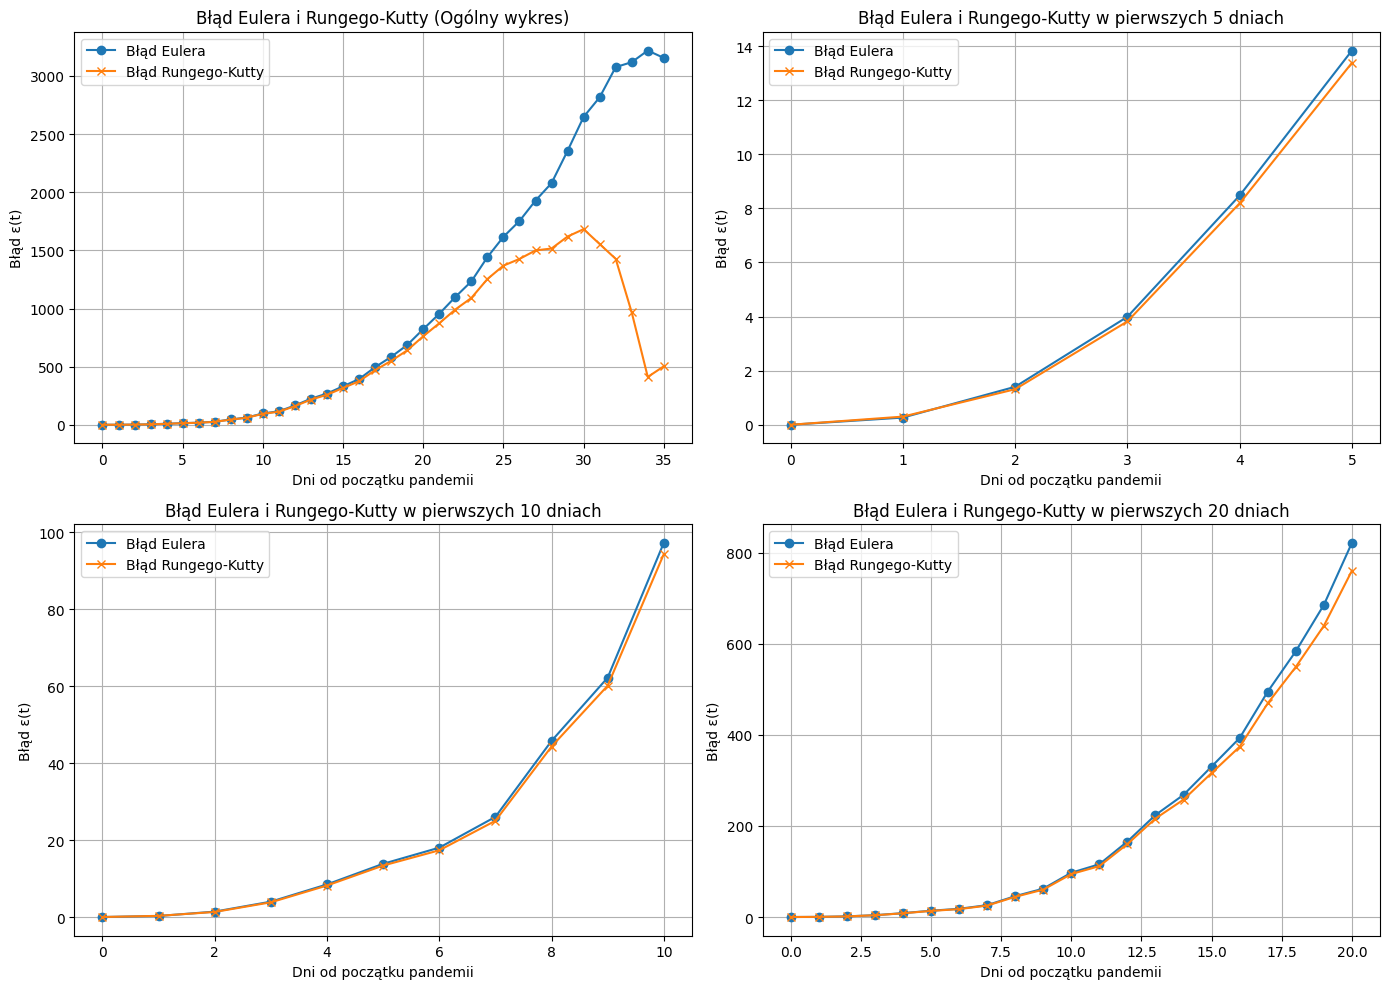

In [101]:
import numpy as np
import matplotlib.pyplot as plt

# Dane
Se = np.array([37899999.0, 37899998.734693885, 37899998.40387341, 37899997.99136053, 37899997.47698224, 37899996.83558402, 37899996.035799734, 
               37899995.038517736, 37899993.7949682, 37899992.24433816, 37899990.31079759, 37899987.8997911, 37899984.893413976, 37899981.14464632, 
               37899976.47016342, 37899970.64137077, 37899963.37322529, 37899954.31029609, 37899943.009383276, 37899928.91784471, 37899911.34657102, 
               37899889.436287425, 37899862.11553462, 37899828.04827427, 37899785.568557434, 37899732.59906184, 37899666.54951569, 37899584.19004265, 
               37899481.49323761, 37899353.437255196, 37899193.76028961, 37898994.65445124, 37898746.384088986, 37898436.80992268, 37898050.795760654, 
               37897569.46886072])

Ie = np.array([1.0, 1.2469387685100426, 1.5548562900975447, 1.9388105810959377, 2.4175780646767664, 3.014571788970244, 3.7589863884491064, 4.6872257800602215, 
               5.844683411935284, 7.2879621230524005, 9.087642170013789, 11.331732783373631, 14.129976041472265, 17.619213528917573, 21.970078217632114, 
               27.395338811807633, 34.160304602525486, 42.59579963365413, 53.11434061342598, 66.2303096569151, 82.58510826994276, 102.97852253014612, 
               128.40783308593672, 160.1165822131185, 199.65538223299887, 248.95773815197995, 310.4345911535366, 387.09220435032637, 482.6791525785894, 
               601.8695995333869, 750.4918173708928, 935.813112151005, 1166.8950703111586, 1455.0364700187931, 1814.3254723904915, 2262.328026911963])

S = np.array([37899999, 37899999, 37899997, 37899994, 37899989, 37899983, 37899978, 37899969, 37899948, 37899930, 37899893, 37899872, 37899819, 
              37899757, 37899708, 37899640, 37899570, 37899459, 37899359, 37899243, 37899089, 37898935, 37898763, 37898595, 37898344, 37898116, 
              37897914, 37897656, 37897403, 37896997, 37896546, 37896178, 37895670, 37895318, 37894832, 37894414])

# Obliczanie błędów
error_euler = np.abs(S - Se)
error_rk = np.abs(S - Srk)

# Dni (t)
days = np.arange(len(S))

# Tworzenie wykresów w układzie 2x2
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Wykres ogólny
axs[0, 0].plot(days, error_euler, label="Błąd Eulera", marker='o')
axs[0, 0].plot(days, error_rk, label="Błąd Rungego-Kutty", marker='x')
axs[0, 0].set_title("Błąd Eulera i Rungego-Kutty (Ogólny wykres)")
axs[0, 0].set_xlabel("Dni od początku pandemii")
axs[0, 0].set_ylabel("Błąd ε(t)")
axs[0, 0].legend()
axs[0, 0].grid(True)

# Wykres dla 5 dni
axs[0, 1].plot(days[:6], error_euler[:6], label="Błąd Eulera", marker='o')
axs[0, 1].plot(days[:6], error_rk[:6], label="Błąd Rungego-Kutty", marker='x')
axs[0, 1].set_title("Błąd Eulera i Rungego-Kutty w pierwszych 5 dniach")
axs[0, 1].set_xlabel("Dni od początku pandemii")
axs[0, 1].set_ylabel("Błąd ε(t)")
axs[0, 1].legend()
axs[0, 1].grid(True)

# Wykres dla 10 dni
axs[1, 0].plot(days[:11], error_euler[:11], label="Błąd Eulera", marker='o')
axs[1, 0].plot(days[:11], error_rk[:11], label="Błąd Rungego-Kutty", marker='x')
axs[1, 0].set_title("Błąd Eulera i Rungego-Kutty w pierwszych 10 dniach")
axs[1, 0].set_xlabel("Dni od początku pandemii")
axs[1, 0].set_ylabel("Błąd ε(t)")
axs[1, 0].legend()
axs[1, 0].grid(True)

# Wykres dla 20 dni (kontynuacja)
axs[1, 1].plot(days[:21], error_euler[:21], label="Błąd Eulera", marker='o')
axs[1, 1].plot(days[:21], error_rk[:21], label="Błąd Rungego-Kutty", marker='x')
axs[1, 1].set_title("Błąd Eulera i Rungego-Kutty w pierwszych 20 dniach")
axs[1, 1].set_xlabel("Dni od początku pandemii")
axs[1, 1].set_ylabel("Błąd ε(t)")
axs[1, 1].legend()
axs[1, 1].grid(True)

# Ustawienie odstępów między wykresami
plt.tight_layout()

# Wyświetlenie wykresów
plt.show()


## Porównanie błędu metod Eulera i Rungego-Kutty za pomocą metody MSE

Aby ocenić dokładność obu metod numerycznych (metody Eulera i metody Rungego-Kutty) w rozwiązywaniu równań różniczkowych, wykorzystujemy metodę Mean Squared Error(MSE), którą już przedstawiłem.
#### Obliczenia MSE:

1. **Metoda Eulera**: MSE dla tej metody wynosi:
   - MSE = `2267314.473858934` 
2. **Metoda Rungego-Kutty**: MSE dla tej metody wynosi:
   - MSE = `726020.5538210635` 

Im mniejsza wartość MSE, tym dokładniejsza jest metoda.

#### Wykres porównawczy:
Na poniższym wykresie przedstawiono porównanie MSE dla obu metod. Z wykresu wynika, że **metoda Rungego-Kutty** osiągnęła mniejszy błąd MSE w porównaniu do metody Eulera, co oznacza, że jest bardziej precyzyjna w rozwiązywaniu tego konkretnego problemu.

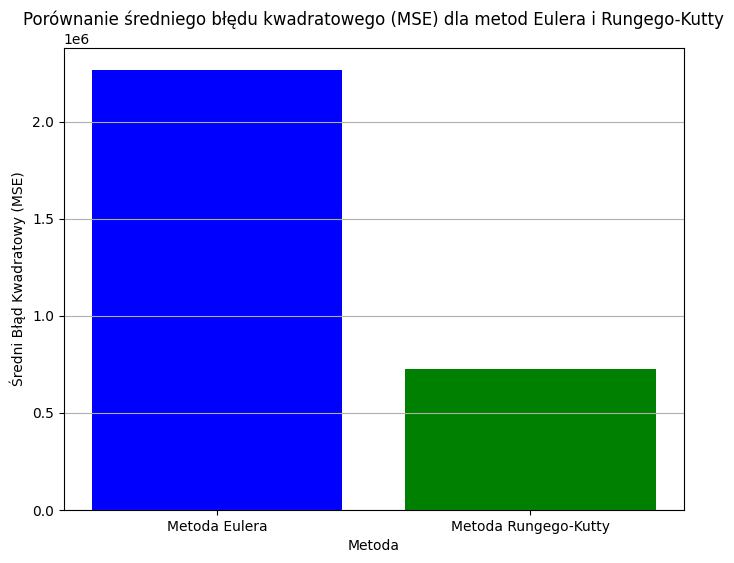

In [102]:
import numpy as np
import matplotlib.pyplot as plt

# Przykładowe dane dla metod
S = [37899999, 37899999, 37899997, 37899994, 37899989, 37899983, 37899978, 37899969, 37899948, 37899930, 37899893, 37899872, 37899819, 37899757, 37899708, 37899640, 37899570, 37899459, 37899359, 37899243, 37899089, 37898935, 37898763, 37898595, 37898344, 37898116, 37897914, 37897656, 37897403, 37896997, 37896546, 37896178, 37895670, 37895318, 37894832, 37894414]

# Przekonwertowanie list na tablice NumPy
S_array = np.array(S)
Se_array = np.array(Se)
Srk_array = np.array(Srk)

# Obliczanie MSE
mse_euler = np.mean((S_array - Se_array) ** 2)
mse_rk = np.mean((S_array - Srk_array) ** 2)

# Wykres porównujący MSE
plt.figure(figsize=(8, 6))
plt.bar(["Metoda Eulera", "Metoda Rungego-Kutty"], [mse_euler, mse_rk], color=['blue', 'green'])
plt.xlabel("Metoda")
plt.ylabel("Średni Błąd Kwadratowy (MSE)")
plt.title("Porównanie średniego błędu kwadratowego (MSE) dla metod Eulera i Rungego-Kutty")
plt.grid(True, axis='y')
plt.show()


#### Wnioski:
- **Metoda Rungego-Kutty**: Osiągnęła lepszą dokładność (mniejsze MSE), co sugeruje, że jest bardziej stabilna i dokładna.
- **Metoda Eulera**: Choć jest prostsza do implementacji, jej dokładność jest niższa w porównaniu do metody Rungego-Kutty.

W kontekście zastosowań wymagających dużej precyzji, metoda Rungego-Kutty może być bardziej odpowiednia, natomiast metoda Eulera może być wystarczająca w przypadkach, gdzie mniej dokładne wyniki są akceptowalne.

---

# Podsumowanie

---

# Literatura

https://www.youtube.com/watch?v=2GEzDzbMkpk&t=1098s&ab_channel=ICMUniversityofWarsaw - fajny filmik o modelowaniu epidemii uwzględnia rozwój epidemii w Polsce, konkretne miasta dużo przydatnych materiałów dobry wzór

https://sc21.icm.edu.pl/index.php/icm-epidemiological-model/ - Artykuł twórcy filmiku różne wykresy

https://www.youtube.com/watch?v=j46osLueJKc&ab_channel=FranciszekRakowski - filmik pokazujacy rozprzestrzenianie sie epidemii w Polsce (Graf)

https://kosmos.ptpk.org/index.php/Kosmos/article/download/2828/2719/5664 - wytłumaczenie modelu SIR, SEIR oraz SI

https://koronawirusunas.pl/ - wszystkie dane dotyczace koronawirusa w Polsce od poczatku epidemii

https://www.iorajournal.org/ijgor/article/view/67/73 - artykul o analizie SIR przy uzyciu metod numerycznych

https://youtu.be/ukNbG7muKho?si=aFuv6m7yGa3H3dvo - Metoda Eulera

https://foton.if.uj.edu.pl/documents/12579485/149668788/E_G-N.pdf/8f29f7de-63b5-4709-8bba-57e3461f790b - SI, SIS, SIR artykul Uniwersytetu Jagiellonskiego 

https://blog.tonytsai.name/blog/2014-11-24-rk4-method-for-solving-sir-model - uzycie rk4 na SIR